In [1]:
import os, sys
import numpy as np
import EMdata
import torch
import itertools
import random, math
from collections import Counter
import matplotlib
import matplotlib.pyplot as plt
import time

In [2]:
#GPU or CPU
if torch.cuda.is_available():  
    dev = "cuda:0" 
else:  
    dev = "cpu"  
device = torch.device(dev) 

In [3]:
#data path
file_path='F:/script/class2vec/real_star_file/10340_case2_job270.star'
datatype=0 #0 is relion 3.1, 1 is relion 3, 2 is cryosparc
block_size=128
fast=True
file_name=os.path.basename(file_path)
output_path=os.path.dirname(file_path)+'/'+os.path.splitext(file_name)[0]
if os.path.isdir(output_path) is False:
    os.mkdir(output_path)

In [4]:
if datatype<2:
    file_info=EMdata.read_relion(file_path)
    if datatype==0:
        #read data (relion3.1)
        dataset=file_info.getRdata_31()
        optics=file_info.extractoptic()
    else:
        #read relion 3.0
        dataset=file_info.getRdata()
    metadata=dataset[0]
    print(metadata)
    data=dataset[1]
    print(data[0])
    ##corpus_information=EMdata.process_helical(dataset).extarct_helical_select()
    #label_path=output_path+'\custom_single\pretext'
    #label=np.load(label_path+'/classes_KM.npy')
    if fast:
        corpus_information=EMdata.process_helical(dataset).extarct_helical_select_fast()
    else:
        corpus_information=EMdata.process_helical(dataset).extarct_helical_select()
else:
    #read cryosparc
    dataset=np.load(file_path)
    corpus_information=EMdata.process_cryosparc_helical(dataset).extract_helical()

['_rlnCoordinateX', '_rlnCoordinateY', '_rlnHelicalTubeID', '_rlnAngleTiltPrior', '_rlnAnglePsiPrior', '_rlnHelicalTrackLengthAngst', '_rlnAnglePsiFlipRatio', '_rlnImageName', '_rlnMicrographName', '_rlnOpticsGroup', '_rlnCtfMaxResolution', '_rlnCtfFigureOfMerit', '_rlnDefocusU', '_rlnDefocusV', '_rlnDefocusAngle', '_rlnCtfBfactor', '_rlnCtfScalefactor', '_rlnPhaseShift', '_rlnGroupNumber', '_rlnAngleRot', '_rlnAngleTilt', '_rlnAnglePsi', '_rlnOriginXAngst', '_rlnOriginYAngst', '_rlnClassNumber', '_rlnNormCorrection', '_rlnLogLikeliContribution', '_rlnMaxValueProbDistribution', '_rlnNrOfSignificantSamples']
['3599.781488', '1124.560934', '1', '90.000000', '116.458355', '0.000000', '0.500000', '000001@Extract/job252/Case2/FoilHole_24943298_Data_24944182_24944183_20190125_1637-129188.mrcs', 'Case2/FoilHole_24943298_Data_24944182_24944183_20190125_1637-129188.mrc', '1', '4.172093', '0.180994', '16202.446289', '16096.935547', '54.328850', '0.000000', '1.000000', '0.000000', '1', '0.000000'

TypeError: list indices must be integers or slices, not str

In [ ]:
corpus_dic,helix_name=corpus_information
if fast:
    corpus=corpus_dic
else:
    corpus=list(corpus_dic.values())
corpus_backup=corpus[:]
print(corpus[0])
corpus_backup=corpus[:]

['_rlnCoordinateX', '_rlnCoordinateY', '_rlnHelicalTubeID', '_rlnAngleTiltPrior', '_rlnAnglePsiPrior', '_rlnHelicalTrackLengthAngst', '_rlnAnglePsiFlipRatio', '_rlnImageName', '_rlnMicrographName', '_rlnOpticsGroup', '_rlnCtfMaxResolution', '_rlnCtfFigureOfMerit', '_rlnDefocusU', '_rlnDefocusV', '_rlnDefocusAngle', '_rlnCtfBfactor', '_rlnCtfScalefactor', '_rlnPhaseShift', '_rlnGroupNumber', '_rlnAngleRot', '_rlnAngleTilt', '_rlnAnglePsi', '_rlnOriginXAngst', '_rlnOriginYAngst', '_rlnClassNumber', '_rlnNormCorrection', '_rlnLogLikeliContribution', '_rlnMaxValueProbDistribution', '_rlnNrOfSignificantSamples']
['3599.781488', '1124.560934', '1', '90.000000', '116.458355', '0.000000', '0.500000', '000001@Extract/job252/Case2/FoilHole_24943298_Data_24944182_24944183_20190125_1637-129188.mrcs', 'Case2/FoilHole_24943298_Data_24944182_24944183_20190125_1637-129188.mrc', '1', '4.172093', '0.180994', '16202.446289', '16096.935547', '54.328850', '0.000000', '1.000000', '0.000000', '1', '0.000000'

In [ ]:
#look_data=dataset[1]
#variable=dataset[0]

In [ ]:
# cryosparc
#corpus_ignore=corpus

In [ ]:
corpus_ignore=[]
for i in range(len(corpus)):
    corpus_row=[]
    count=1
    lst=corpus[i]
    for j in range(len(lst)):
        particle=lst[j]
        if j==0:
            count+=particle[1]-1
        if count==int(particle[1]):
            corpus_row.append(str(particle[0]))
            count+=1
        else:
            while 1:
                if count==int(lst[j][1]):
                    corpus_row.append(str(particle[0]))
                    count+=1
                    break
                corpus_row+=['0']
                count+=1               
    corpus_ignore.append(corpus_row)

In [ ]:
print(corpus_ignore[0])

In [ ]:
corpus_length_histogram=[]
for i in range(len(corpus_ignore)):
    corpus_length_histogram.append(len(corpus_ignore[i]))
bins=max(corpus_length_histogram)
print(bins)
plt.hist(corpus_length_histogram,list(range(0,max(corpus_length_histogram)+10,1)))
#plt.ylim((0,1000))
plt.show()

In [ ]:
vocabulary = set(itertools.chain.from_iterable(corpus_ignore))
vocabulary_size = len(vocabulary)
print(vocabulary_size)

In [ ]:
word_to_index = {w: idx for (idx, w) in enumerate(vocabulary)}
index_to_word = {idx: w for (idx, w) in enumerate(vocabulary)}

In [ ]:
from pathlib import Path

from tokenizers import ByteLevelBPETokenizer
if os.path.isdir(output_path+"/corpus") is False:
    os.mkdir(output_path+"/corpus")
paths = [str(x) for x in Path(output_path+"/corpus/").glob("**/*.txt")]

# Initialize a tokenizer
tokenizer = ByteLevelBPETokenizer()

# Customize training
tokenizer.train(files=paths, vocab_size=vocabulary_size, min_frequency=2, special_tokens=[
    "<s>",
    "<pad>",
    "</s>",
    "<unk>",
    "<mask>",
])
if os.path.isdir(output_path+"/tokens") is False:
    os.mkdir(output_path+"/tokens")
if os.path.isdir("./tokens") is False:
    os.mkdir("./tokens")
tokenizer.save_model(output_path+"/tokens")
tokenizer.save_model("./tokens")

In [ ]:
import json

with open(output_path+'/tokens/vocab.json') as f:
    decode = json.load(f)

In [ ]:
encode={value:key for (key, value) in decode.items()}

In [ ]:
corpus_code=[]
for i in range(len(corpus_ignore)):
    lst=corpus_ignore[i]
    corpus_row=[]
    for j in range(len(lst)):
        corpus_row.append(encode[word_to_index[lst[j]]+5])
    corpus_code.append(corpus_row)
print(corpus_code[0])

In [ ]:
with open(output_path+"/corpus/helical.txt","w") as f:
    for i in range(len(corpus_code)):
        lst=corpus_code[i]
        for j in range(len(lst)):
            if j==len(lst)-1:
                f.write(lst[j]+'\n')
            else:
                f.write(lst[j])

In [ ]:
from transformers import RobertaTokenizerFast

tokenizer = RobertaTokenizerFast.from_pretrained(output_path+"/tokens", max_len=514)
#tokenizer.encode(encode[word_to_index['0']+5])

In [ ]:
print(tokenizer)

In [ ]:
from transformers import RobertaConfig

config = RobertaConfig(
    vocab_size=50_000,
    max_position_embeddings=512,
    num_attention_heads=8,
    num_hidden_layers=6,
    type_vocab_size=1,
    position_embedding_type='relative_key'
)

In [ ]:
from transformers import RobertaForMaskedLM

model = RobertaForMaskedLM(config=config)

In [ ]:
%%time
from transformers import LineByLineTextDataset

data_import = LineByLineTextDataset(
    tokenizer=tokenizer,
    file_path=output_path+"/corpus/helical.txt",
    block_size=block_size,
)

In [ ]:
from transformers import DataCollatorForLanguageModeling

data_collator = DataCollatorForLanguageModeling(
    tokenizer=tokenizer, mlm=True, mlm_probability=0.15
)

In [ ]:
print(type(data_import))

In [ ]:
from transformers import Trainer, TrainingArguments


trainer = Trainer(
    model=model,
    data_collator=data_collator,
    train_dataset=data_import
)

In [ ]:
trainer.train()

In [ ]:
trainer.save_model(output_path+"/tokens/")
trainer.save_model("./tokens/")

In [ ]:
from transformers import pipeline

feature_extraction = pipeline(
    'feature-extraction',model="./tokens",tokenizer="./tokens")

In [ ]:
#print(np.shape(feature_extraction(encode[word_to_index['50']+5])))
#print(np.squeeze(feature_extraction('DGG'))[0]-np.squeeze(feature_extraction('JJ'))[0])
print(len(''.join(corpus_code[2])))
print(len(corpus_ignore[2]))

In [ ]:
#def select_random(corpus,number):
    

In [ ]:
def cut_corpus(corpus,cut_length):
    new_corpus=[]
    cut_length=cut_length
    print(len(corpus))
    for i in range(len(corpus)):
        lst=corpus[i]
        n=len(lst)
        if n<=cut_length:
            new_corpus.append(lst)
            continue
        if n%cut_length==0:
            cut_amount=int(n/cut_length)
        else:
            cut_amount=int((n-n%cut_length)/cut_length)+1
        for j in range(cut_amount-1):
            new_corpus.append(lst[j*cut_length:(j+1)*cut_length])
        new_corpus.append(lst[(cut_amount-1)*cut_length:])
    print(len(new_corpus))
    return new_corpus
corpus_code_cut=cut_corpus(corpus_code,block_size-2)

In [ ]:
filament_embeddings=[]
for i in range(len(corpus_code_cut)):
    if i%200==0:
        print(i)
    lst=list(np.squeeze(feature_extraction(''.join(corpus_code_cut[i])))[0])
    filament_embeddings.append(lst)

In [ ]:
print(''.join(corpus_code_cut[3938][12:-5]))
lst=list(np.squeeze(feature_extraction(''.join(corpus_code_cut[3938])[12:23])))
print(len(corpus_code_cut[3938][11:-5]))

In [ ]:
print(len(lst))

In [ ]:
len(''.join(corpus_code_cut[77]))

In [37]:
import umap
import sklearn
from sklearn.cluster import KMeans,SpectralClustering,MeanShift, estimate_bandwidth,DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.manifold import TSNE
from scipy.spatial.distance import cdist
from scipy.stats import multivariate_normal 
from sklearn.decomposition import PCA
import matplotlib.patches as mpatches
from sklearn import metrics
from sklearn.metrics import pairwise_distances

In [38]:
filament_embeddings=np.array(filament_embeddings)
mask_1 = np.isfinite(filament_embeddings).all(axis=1)

In [39]:
len(filament_embeddings[mask_1])

6410

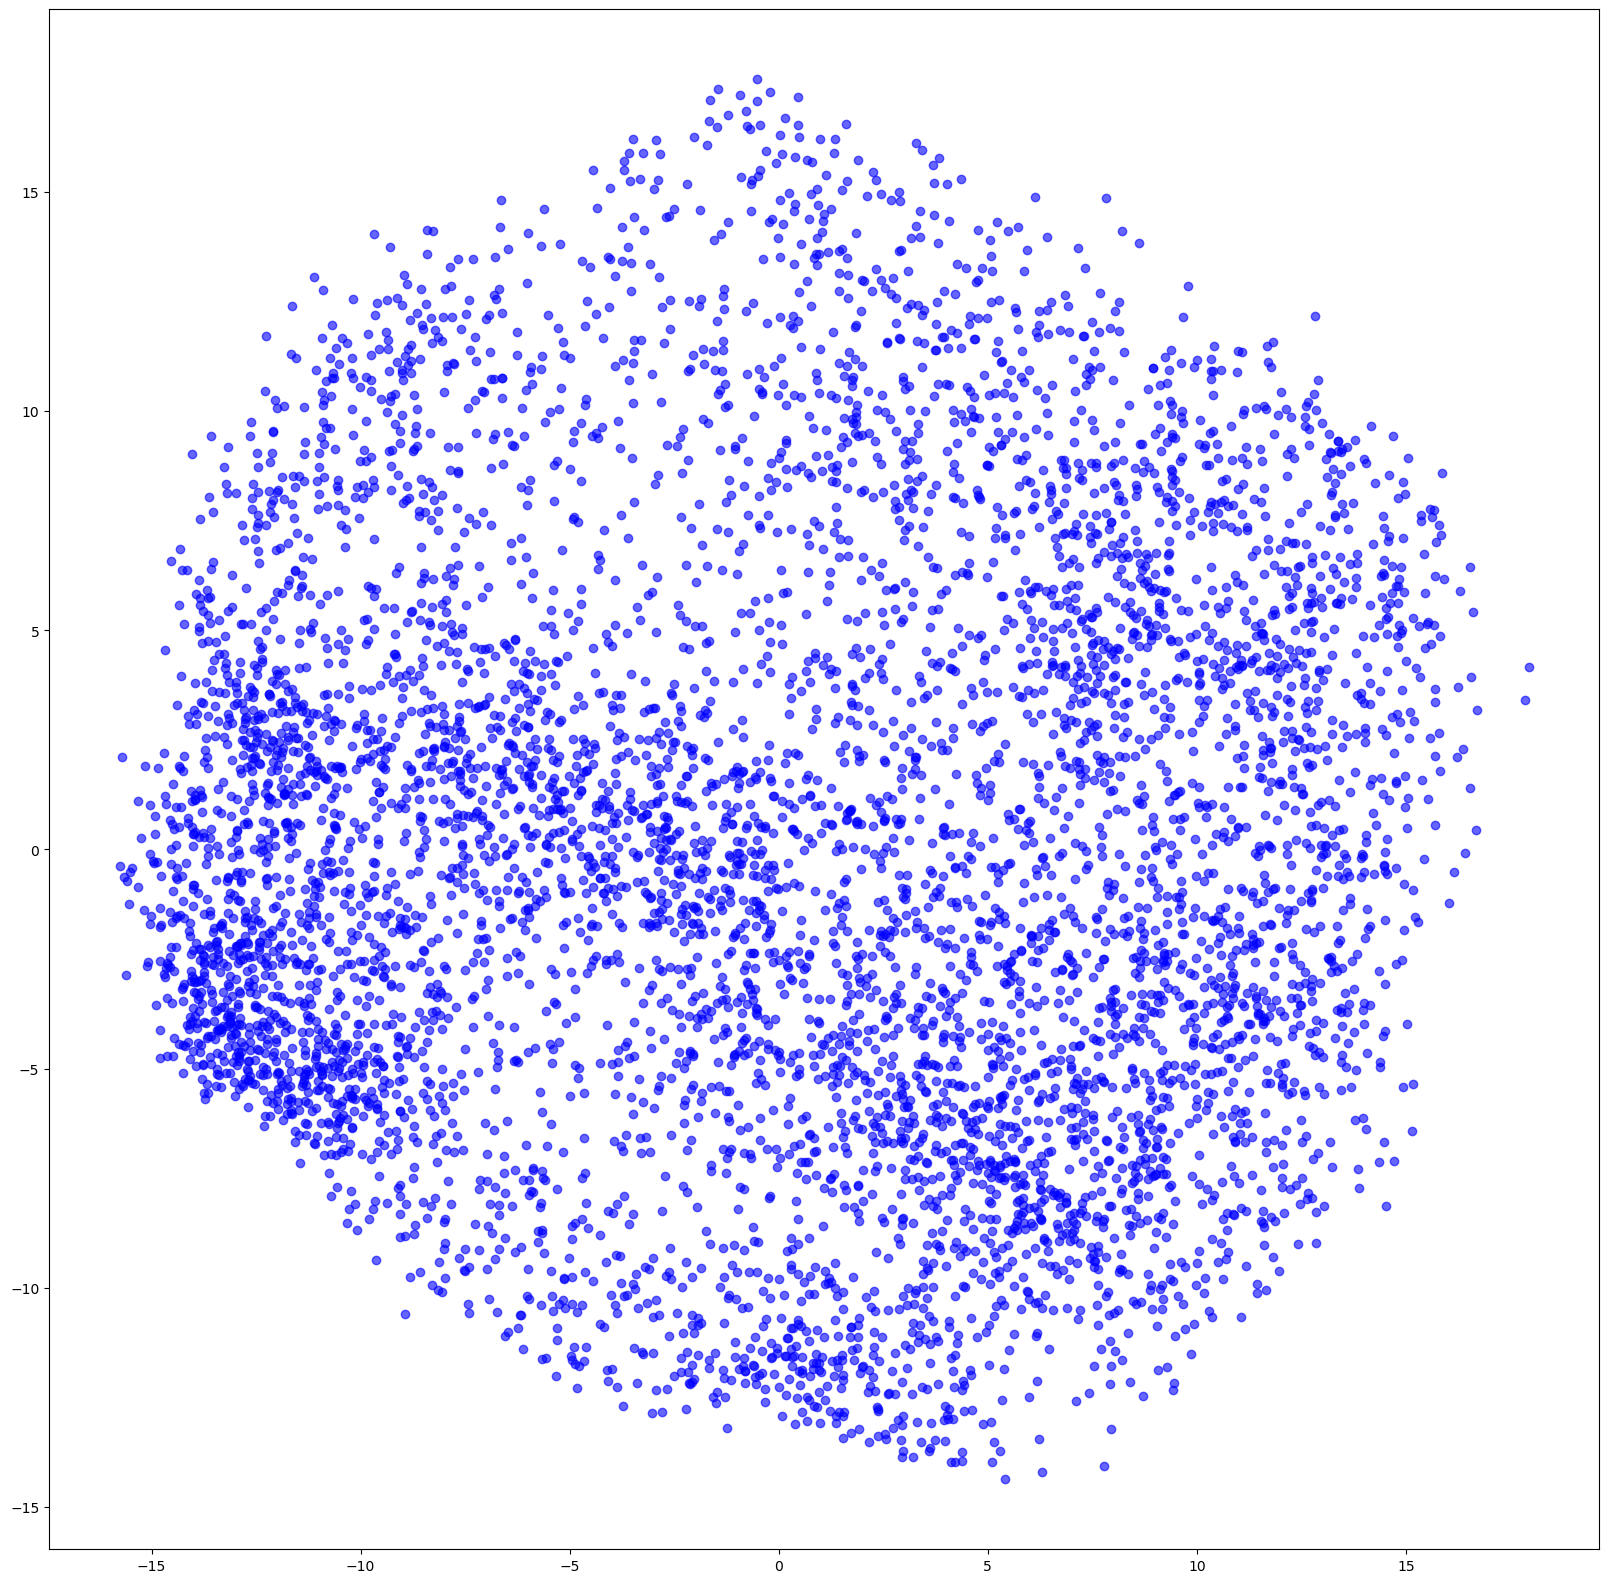

In [40]:
pca_sum = PCA(n_components=2).fit_transform(filament_embeddings)
#cluster_pca = KMeans(n_clusters=3).fit_predict(pca_sum[0:len(corpus)])
pca_sum_hD = PCA(n_components=30).fit_transform(filament_embeddings)

plt.figure(figsize = (20, 20))
plt.scatter(pca_sum[:,0], pca_sum[:,1],alpha=0.6,color='blue')
plt.savefig(output_path+'/'+os.path.splitext(file_name)[0]+"_bert_pca.png",bbox_inches='tight', pad_inches=0.01)
plt.show()


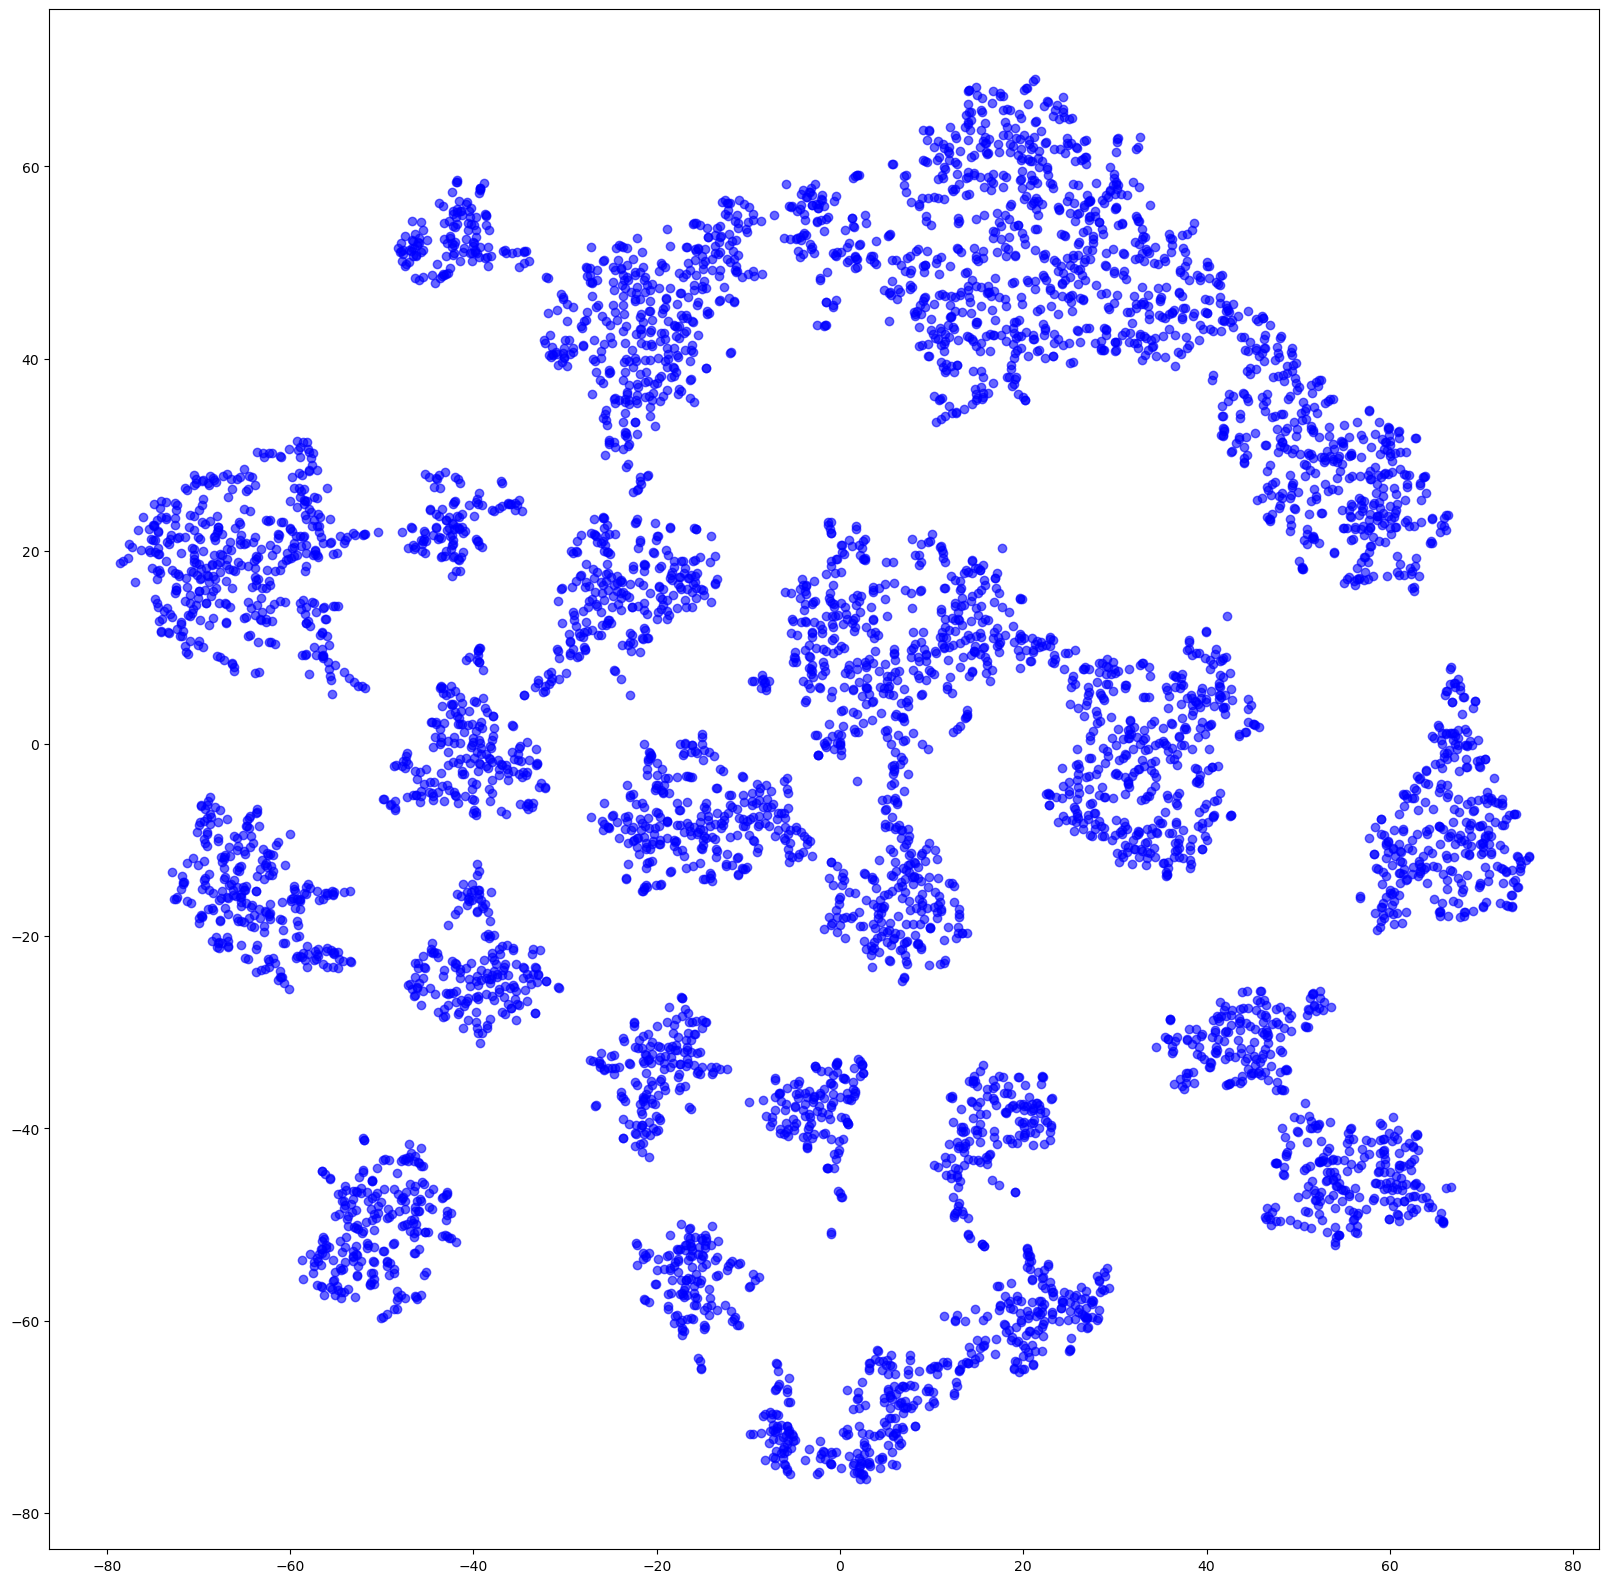

In [41]:
tsne_2D = TSNE(n_components=2).fit_transform(filament_embeddings)
#cluster_pca = KMeans(n_clusters=3).fit_predict(pca_sum[0:len(corpus)])
#tsne_hD = TSNE(n_components=30).fit_transform(filament_embeddings)

plt.figure(figsize = (20, 20))
plt.scatter(tsne_2D[:,0], tsne_2D[:,1],alpha=0.6,color='blue')
plt.savefig(output_path+'/'+os.path.splitext(file_name)[0]+"_bert_tsne.png",bbox_inches='tight', pad_inches=0.01)
plt.show()


In [51]:
%%time
n_neighbors=100
min_dist=0.1
#umap_ND=umap.UMAP(n_neighbors=200,min_dist=0.4,n_components=100).fit_transform(filament_embeddings)
reducer = umap.UMAP(n_neighbors=n_neighbors,min_dist=min_dist)
umap_2D = reducer.fit_transform(filament_embeddings)
umap_ND=umap.UMAP(n_neighbors=n_neighbors,min_dist=min_dist,n_components=100).fit_transform(filament_embeddings)
print('finish umap')

finish umap
Wall time: 33.8 s


2
3
4
5
6
7
8
9
10
11
12
13
14
[0.35034007, 0.29000852, 0.35858902, 0.37704316, 0.45703134, 0.4520966, 0.49545068, 0.4812006, 0.46320903, 0.47718945, 0.5288168, 0.58694637, 0.57674944]


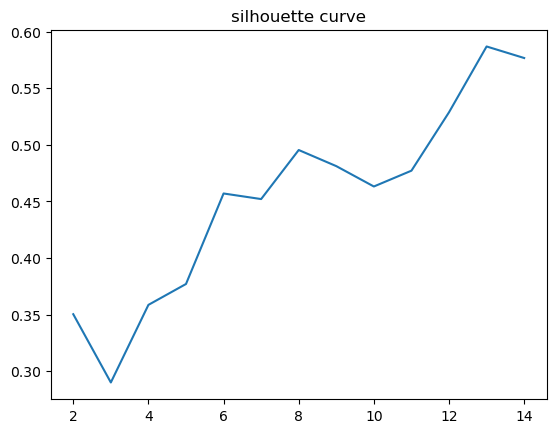

In [52]:
res=[]
n_cluster = range(2,15)
for i in n_cluster:
    print(i)
    kmeans_model = KMeans(n_clusters=i).fit(umap_2D)
    labels = kmeans_model.labels_
    a=metrics.silhouette_score(umap_ND, labels, metric='euclidean')
    res.append(a)

plt.plot(n_cluster, res)
print(res)
plt.title('silhouette curve')
plt.savefig(output_path+'/'+os.path.splitext(file_name)[0]+"_bert_umap_silhouette.png",bbox_inches='tight', pad_inches=0.01)
plt.show()

In [53]:
with open(output_path+'/'+'umap_3D_bert.npy', 'wb') as f:
    np.save(f, umap_ND)

In [54]:
filament_cluster_number=2
umap_predict=KMeans(n_clusters=filament_cluster_number).fit_predict(umap_2D)
#umap_predict=DBSCAN(eps=0.41, min_samples=100).fit_predict(umap_2D)+1
#filament_cluster_number=len(np.unique(umap_predict))

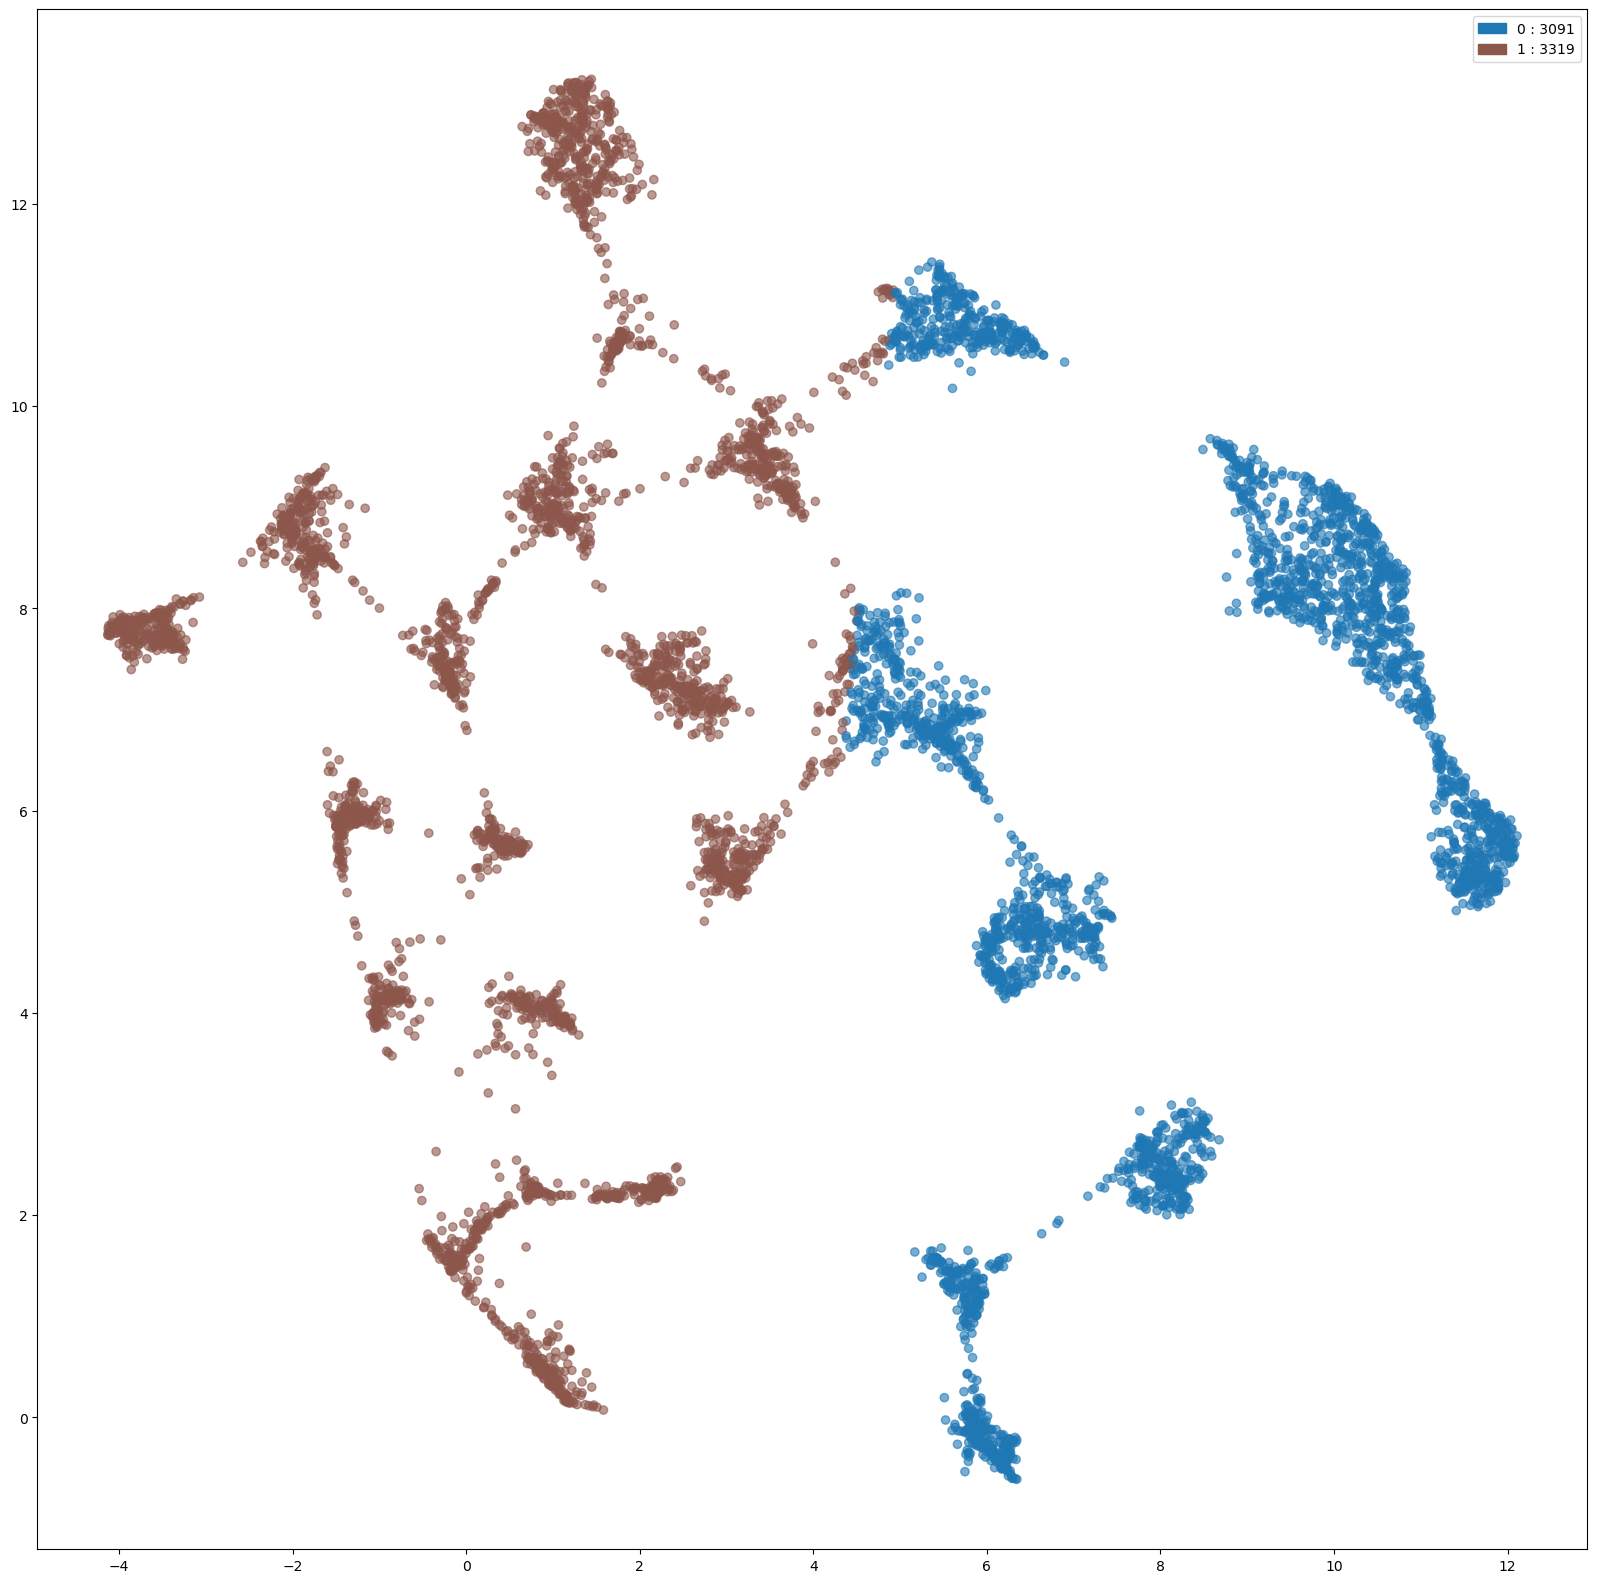

In [55]:
plt.figure(figsize = (20, 20))

for i in range(filament_cluster_number):
    locals()['labels'+str(i)]=mpatches.Patch(color=plt.cm.tab20((i)/filament_cluster_number), 
                                             label=str(i)+' : '+str(np.count_nonzero(umap_predict==i)))
plt.legend(handles=[eval('labels'+str(i)) for i in range(filament_cluster_number)])
plt.scatter(umap_2D[:,0], umap_2D[:,1],alpha=0.6,c=plt.cm.tab20((umap_predict)/filament_cluster_number))
#plt.scatter(umap_2D[:,0], umap_2D[:,1],alpha=0.4,c='blue')
#plt.xlim((-20,20))
#plt.ylim((-10,20))
plt.savefig(output_path+'/'+os.path.splitext(file_name)[0]+"_bert_umap_blue.png",bbox_inches='tight', pad_inches=0.01)
plt.show()
#c=plt.cm.tab20((umap_predict+1)/filament_cluster_number)

In [56]:
for i in range(filament_cluster_number):
    cluster_name='cluster'+str(i)
    cluster_nameID='clusterID'+str(i)
    locals()[cluster_name]=[]
    locals()[cluster_nameID]=[]
data_line=0
cluster_choice=umap_predict
positive_label=[]
for i in range(len(corpus_code_cut)):
    lst=corpus_code_cut[i]
    cluster_number=cluster_choice[i]
    cluster_name='cluster'+str(cluster_number)
    cluster_nameID='clusterID'+str(cluster_number)
    for j in range(len(lst)):
        locals()[cluster_name].append(data[data_line])
        locals()[cluster_nameID].append(data[data_line][7][18:21])
        data_line+=1
    positive_label.append(locals()[cluster_nameID][-1])
positive_label=np.array(positive_label)
labels=list(np.unique(positive_label))
positive_label_new=np.array([float(labels.index(x)) for x in positive_label])
labels_name=['singlet','doublet'] # define the type of filaments 
clustersize=[]
for i in range(filament_cluster_number):
    clustersize.append(len(locals()['cluster'+str(i)]))
print(clustersize)

[210773, 191622]


In [57]:
data[0][7][18:21]

'126'

6410


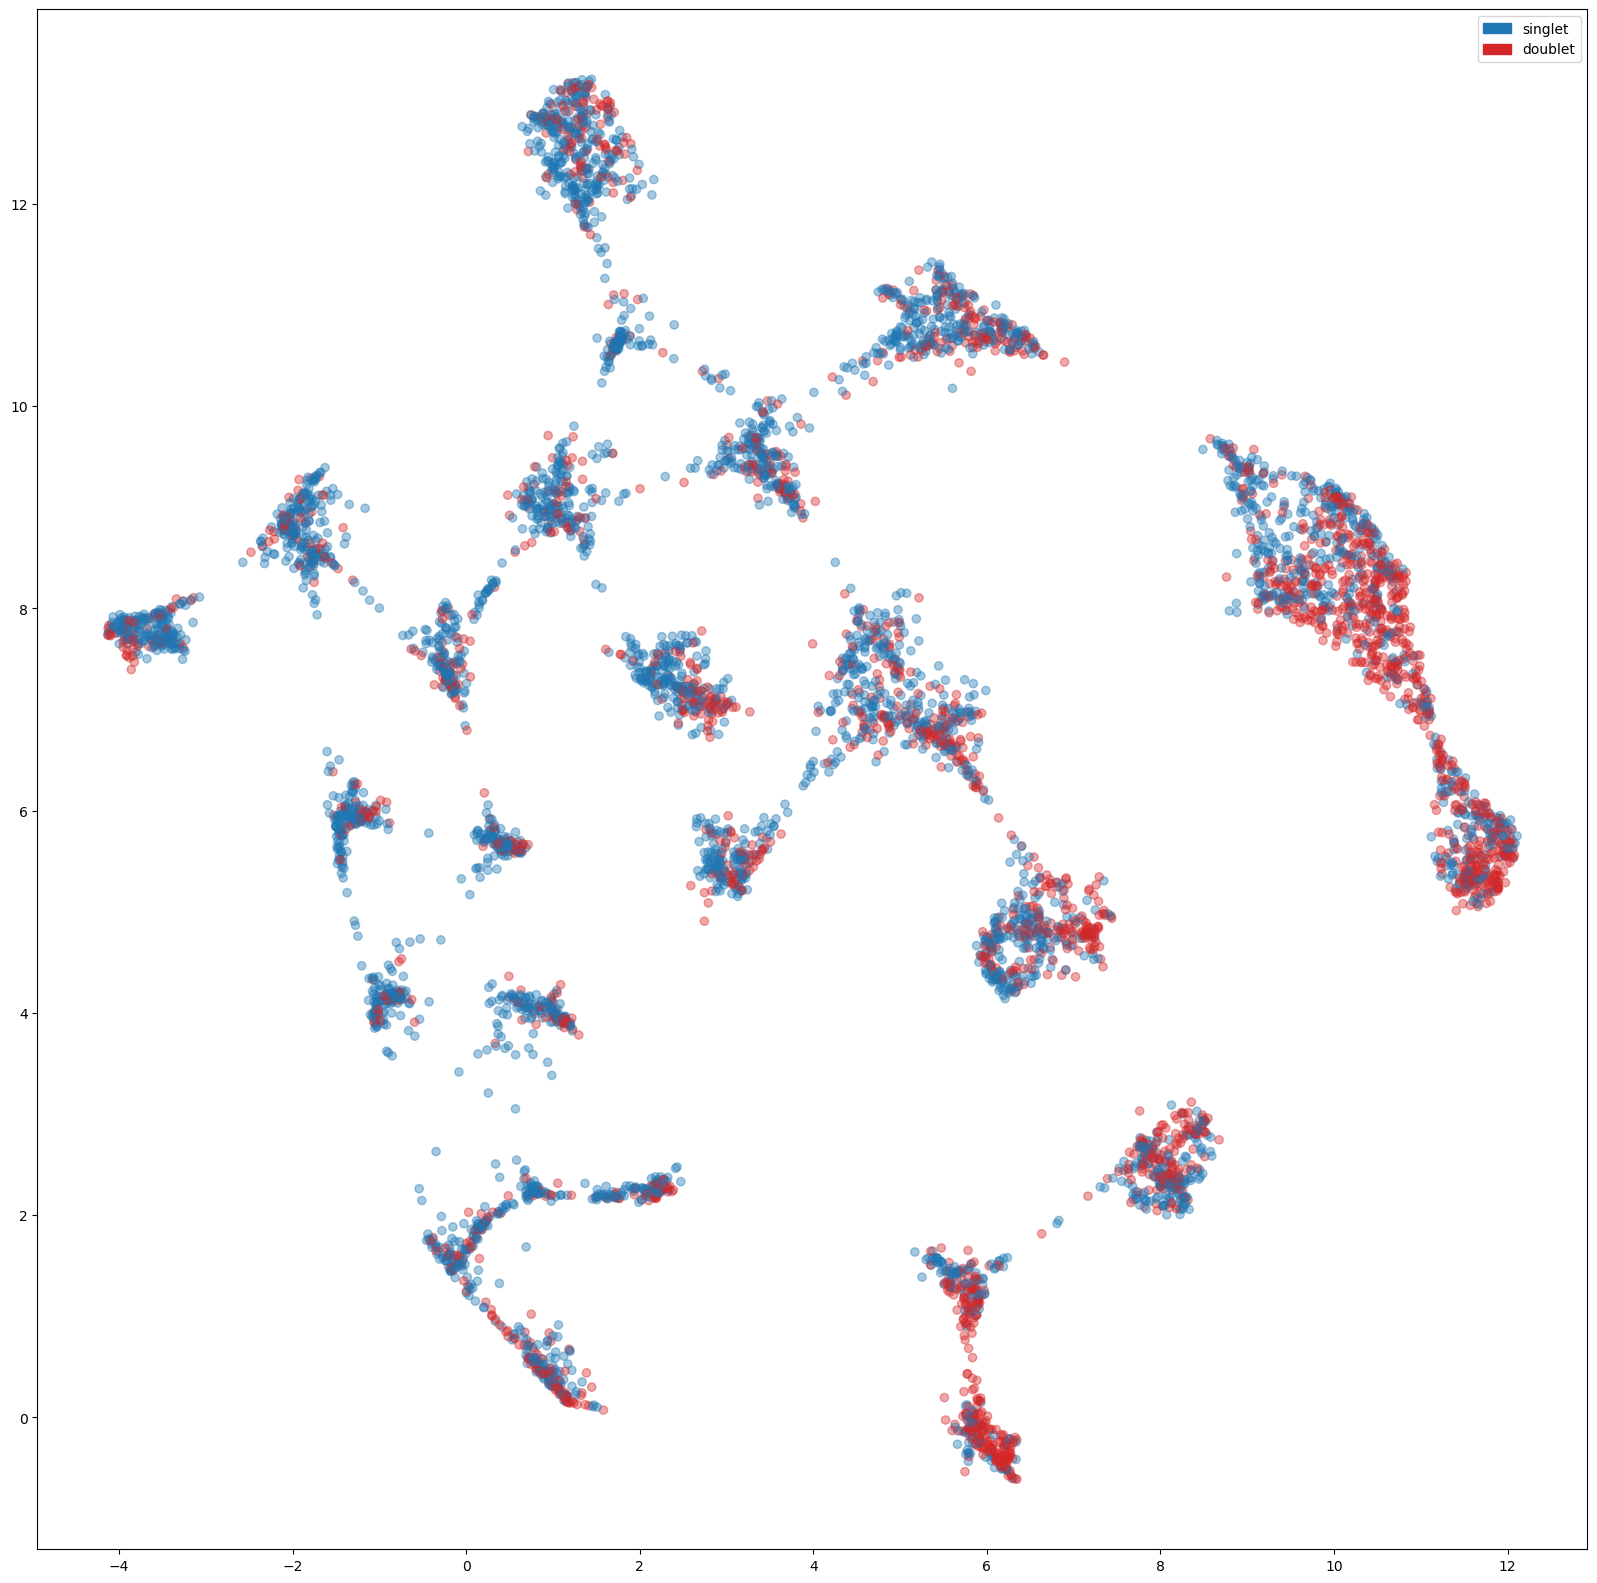

In [58]:
plt.figure(figsize = (20, 20))
for i in range(len(labels_name)):
    locals()['true_label'+str(i)]=mpatches.Patch(color=plt.cm.tab20(i/3), label=labels_name[i])
plt.legend(handles=[eval('true_label'+str(i)) for i in range(len(labels))])
print(len(positive_label))
plt.scatter(umap_2D[:,0], umap_2D[:,1],color=plt.cm.tab20(positive_label_new/3),alpha=0.4)
plt.savefig(output_path+'/'+os.path.splitext(file_name)[0]+"_bert_umap_label.png",bbox_inches='tight', pad_inches=0.01)
plt.show()

In [59]:
distribution_hist_all=[]
for i in range(filament_cluster_number):
    distribution_hist=[]
    lst=locals()['clusterID'+str(i)]
    for j in range(len(labels)):
        group_percentage=lst.count(labels[j])/len(lst)
        distribution_hist.append(group_percentage)
    distribution_hist_all.append(distribution_hist)
print(distribution_hist_all)
print(len(data),len(cluster0),len(cluster1))

fig, ax = plt.subplots(1,filament_cluster_number,figsize = (5*filament_cluster_number,7))

for i in range(filament_cluster_number):
    ax[i].bar(range(len(labels)),distribution_hist_all[i],tick_label =labels_name)
    particle_number=len(locals()['cluster'+str(i)])
    ax[i].set_title('cluster{} amount: {}'.format(i,particle_number))
plt.savefig(output_path+'/'+os.path.splitext(file_name)[0]+'distr_new_bert.png')
print('a')

[[0.4465894588016492, 0.5534105411983509], [0.712590412374362, 0.28740958762563795]]
402395 210773 191622
a


In [ ]:
for i in range(filament_cluster_number):
    cluster_name='cluster'+str(i)
    data_cluster=locals()[cluster_name]
    if datatype==0:
        output=EMdata.output_star(output_path+'/bert_'+file_name,i,data_cluster,metadata)
        output.opticgroup(optics)
        output.writecluster()
    elif datatype==1:
        output=EMdata.output_star(output_path+'/'+file_name,i,data_cluster,metadata)
        output.writemetadata()
        output.writecluster()